In [2]:
PATH = '../../data/silver_layer/SupplyChain_Dataset.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(PATH)

In [5]:
data.head().T

,0,1,2,3,4
timestamp,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00
vehicle_gps_latitude,40.375568,33.507818,30.02064,36.649223,30.001279
vehicle_gps_longitude,-77.014318,-117.036902,-75.269224,-70.190529,-70.012195
fuel_consumption_rate,5.136512,5.101512,5.090803,8.219558,5.000075
eta_variation_hours,4.998009,0.984929,4.972665,3.095064,3.216077
traffic_congestion_level,5.927586,1.591992,8.787765,0.045257,8.004851
warehouse_inventory_level,985.716862,396.700206,832.408935,0.573283,914.925067
loading_unloading_time,4.951392,1.030379,4.220229,0.530186,3.62089
handling_equipment_availability,0.481294,0.62078,0.810933,0.008525,0.020083
order_fulfillment_status,0.761166,0.196594,0.152742,0.811885,0.053659


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

# Overview of the dataset

In [5]:
# Overview of the dataset
print("Dataset Shape:", data.shape)
print("Column Data Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (32065, 60)
Column Data Types:
timestamp                           object
vehicle_gps_latitude               float64
vehicle_gps_longitude              float64
fuel_consumption_rate              float64
eta_variation_hours                float64
traffic_congestion_level           float64
warehouse_inventory_level          float64
loading_unloading_time             float64
handling_equipment_availability    float64
order_fulfillment_status           float64
weather_condition_severity         float64
port_congestion_level              float64
shipping_costs                     float64
supplier_reliability_score         float64
lead_time_days                     float64
historical_demand                  float64
iot_temperature                    float64
cargo_condition_status             float64
route_risk_level                   float64
customs_clearance_time             float64
driver_behavior_score              float64
fatigue_monitoring_score           float64
disrupti

# Handling timestamps

In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['Scheduled_Delivery'] = pd.to_datetime(data['Scheduled_Delivery'])
data['Actual_Delivery'] = pd.to_datetime(data['Actual_Delivery'])

# Time-based features

In [7]:
data['Delivery_Delay'] = (data['Actual_Delivery'] - data['Scheduled_Delivery']).dt.days
data['Month'] = data['timestamp'].dt.month
data['Weekday'] = data['timestamp'].dt.weekday

# Key numeric features for supply chain disruption

In [8]:
missing_columns = [
    'recovery_time_days', 'delay_duration', 'weather_risk'
]
existing_columns = [col for col in missing_columns if col in data.columns]

if len(existing_columns) < len(missing_columns):
    print("The following columns are missing:", set(missing_columns) - set(existing_columns))

key_features = [
    'delay_probability', 'disruption_likelihood_score', 'weather_condition_severity', 
    'traffic_congestion_level', 'port_congestion_level', 'warehouse_inventory_level', 
    'fuel_consumption_rate', 'supplier_reliability_score', 'route_risk_level', 
    'delivery_time_deviation'
] + existing_columns

print("\nUpdated Key Features for Analysis:")
print(key_features)

# Descriptive statistics for available features
print("\nDescriptive Statistics:")
data[key_features].describe()


The following columns are missing: {'weather_risk', 'delay_duration', 'recovery_time_days'}

Updated Key Features for Analysis:
['delay_probability', 'disruption_likelihood_score', 'weather_condition_severity', 'traffic_congestion_level', 'port_congestion_level', 'warehouse_inventory_level', 'fuel_consumption_rate', 'supplier_reliability_score', 'route_risk_level', 'delivery_time_deviation']

Descriptive Statistics:


,delay_probability,disruption_likelihood_score,weather_condition_severity,traffic_congestion_level,port_congestion_level,warehouse_inventory_level,fuel_consumption_rate,supplier_reliability_score,route_risk_level,delivery_time_deviation
count,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,32065.000000,32065.000000
mean,0.699077,0.803656,4.976082e-01,4.991493e+00,6.978414,2.992547e+02,8.011735,5.008499e-01,7.001144,5.177648
std,0.324514,0.279185,3.532853e-01,3.532048e+00,3.251051,3.234435e+02,4.264960,3.535281e-01,3.236328,4.157988
min,0.000003,0.000048,4.536949e-09,1.091633e-09,0.000002,1.322210e-12,5.000000,6.904319e-10,0.000050,-1.999998
25%,0.456009,0.693739,1.440135e-01,1.474720e+00,4.513889,1.605163e+01,5.019984,1.453158e-01,4.593407,1.269197
50%,0.839599,0.958128,4.961781e-01,4.981244e+00,8.383225,1.572880e+02,5.636036,5.032655e-01,8.385605,6.113662
75%,0.982391,0.998746,8.498226e-01,8.534902e+00,9.838150,5.405980e+02,9.669944,8.539780e-01,9.836152,9.249206
max,1.000000,1.000000,1.000000e+00,9.999999e+00,10.000000,9.999993e+02,19.999875,1.000000e+00,10.000000,10.000000


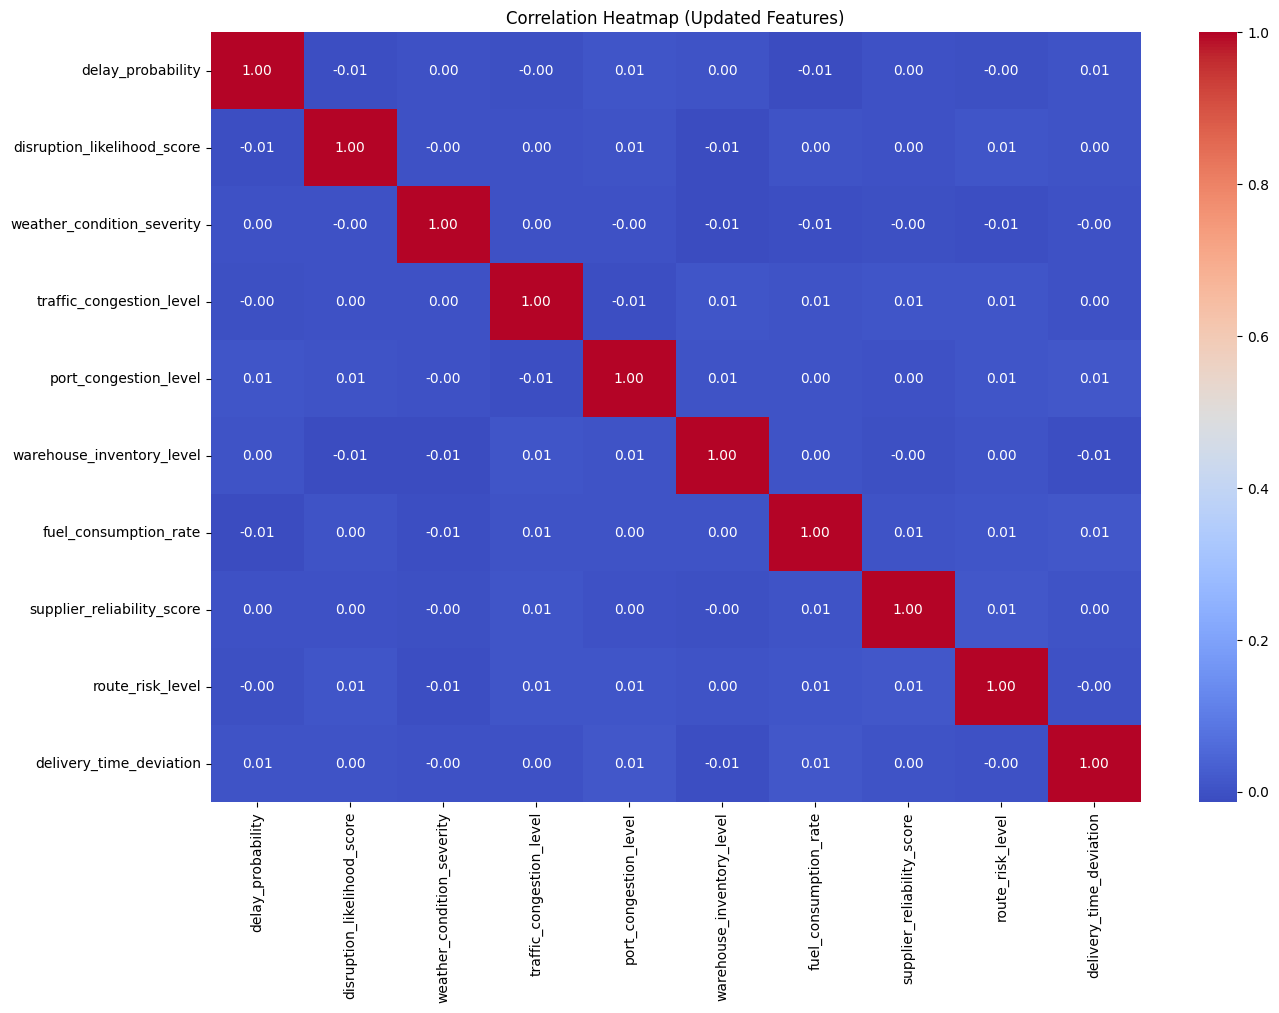

In [9]:
plt.figure(figsize=(15, 10))
corr_matrix = data[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Updated Features)")
plt.show()

# Visualizing missing data

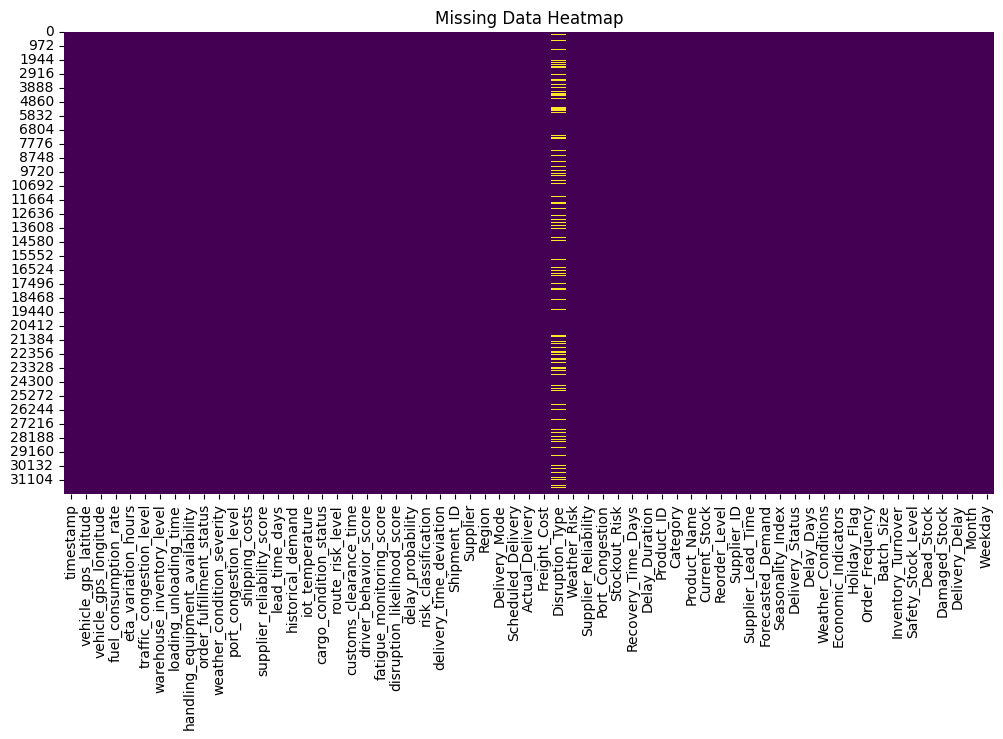

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Correlation heatmap

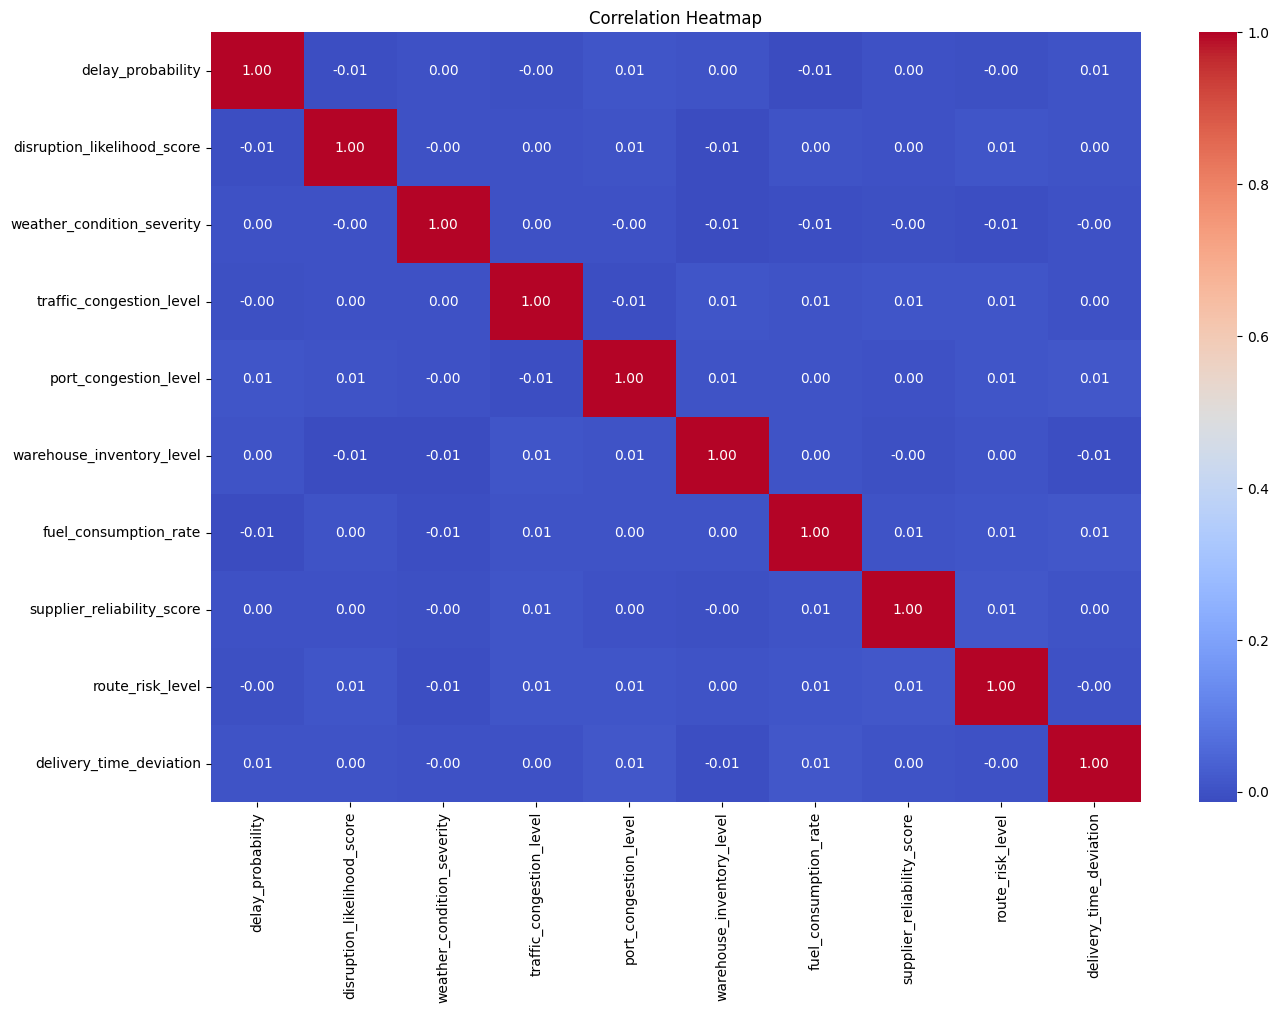

In [11]:
plt.figure(figsize=(15, 10))
corr_matrix = data[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of disruptions

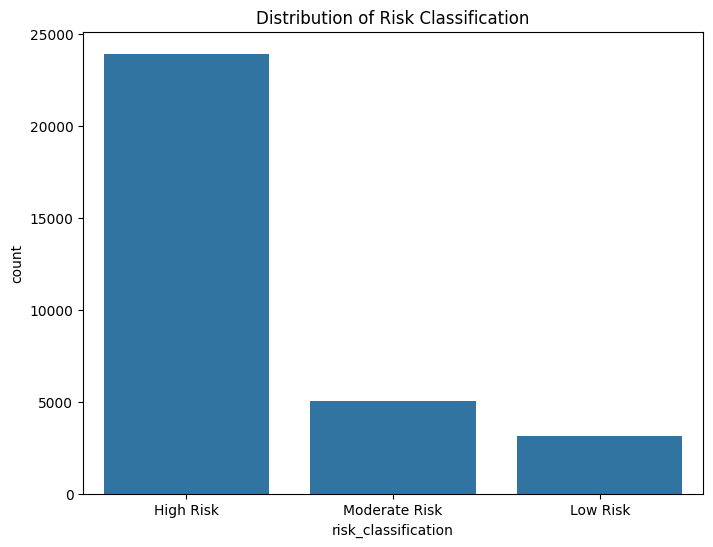

In [12]:

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='risk_classification', order=data['risk_classification'].value_counts().index)
plt.title("Distribution of Risk Classification")
plt.show()

# Weather risk impact on disruption likelihood

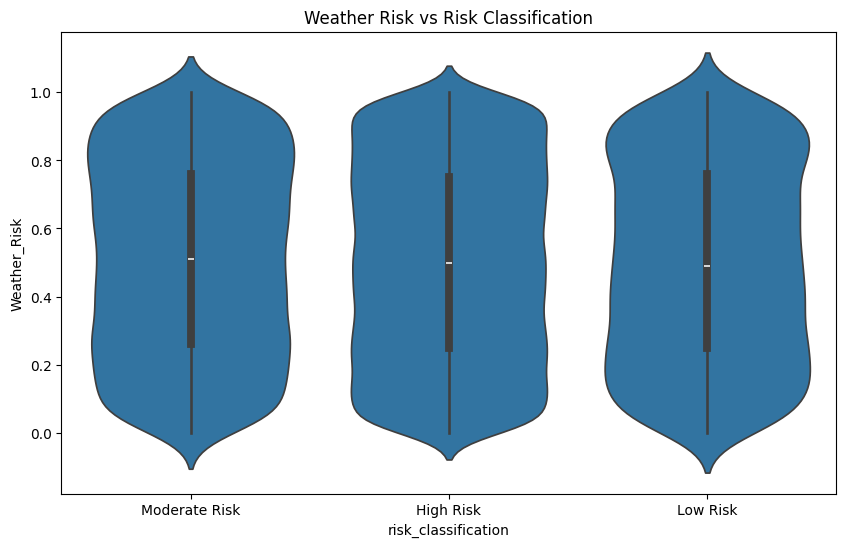

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='risk_classification', y='Weather_Risk')
plt.title("Weather Risk vs Risk Classification")
plt.show()

# Traffic congestion and delays

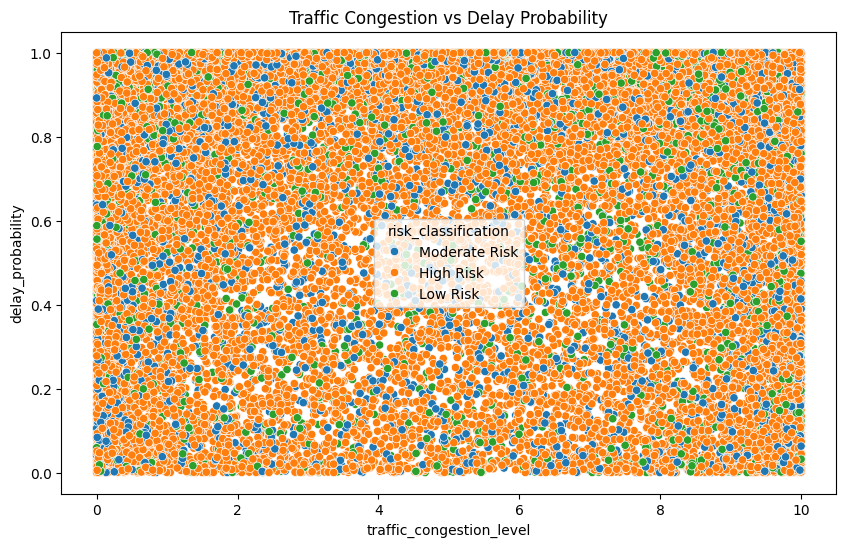

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='traffic_congestion_level', y='delay_probability', hue='risk_classification')
plt.title("Traffic Congestion vs Delay Probability")
plt.show()

# Top disruption types

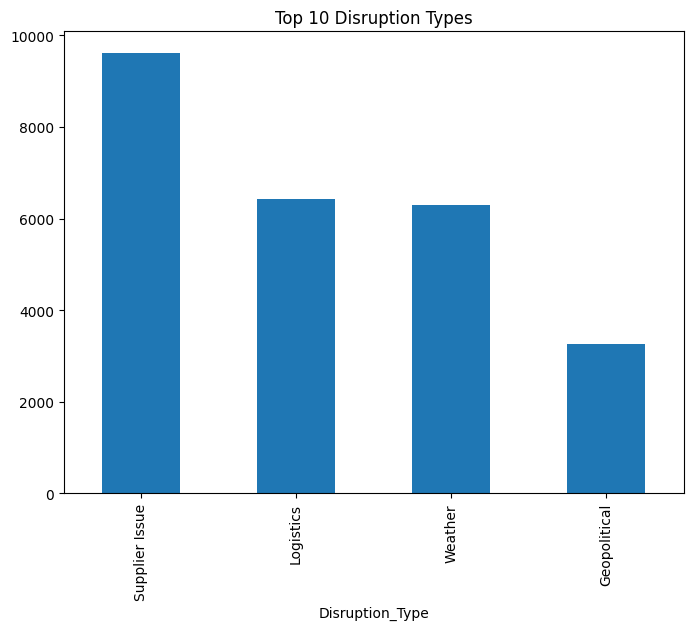

In [15]:

plt.figure(figsize=(8, 6))
data['Disruption_Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Disruption Types")
plt.show()

# Analyzing delivery delay

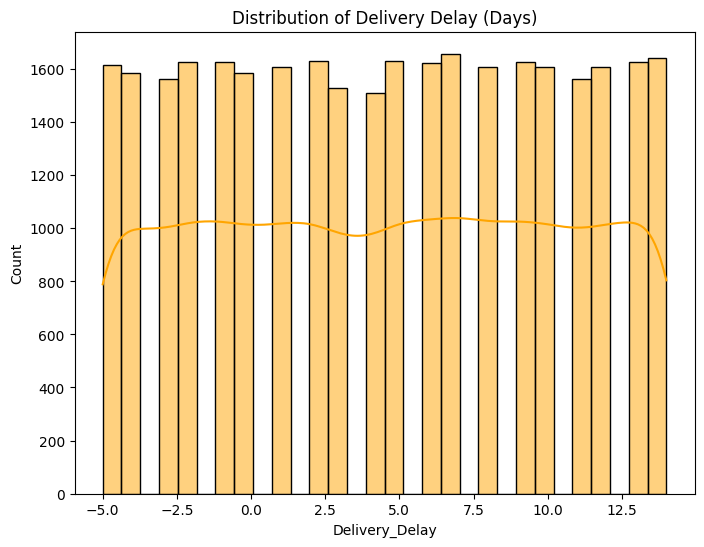

In [16]:

plt.figure(figsize=(8, 6))
sns.histplot(data['Delivery_Delay'], bins=30, kde=True, color='orange')
plt.title("Distribution of Delivery Delay (Days)")
plt.show()

# Feature importance analysis for disruptions (example with 'delay_probability')

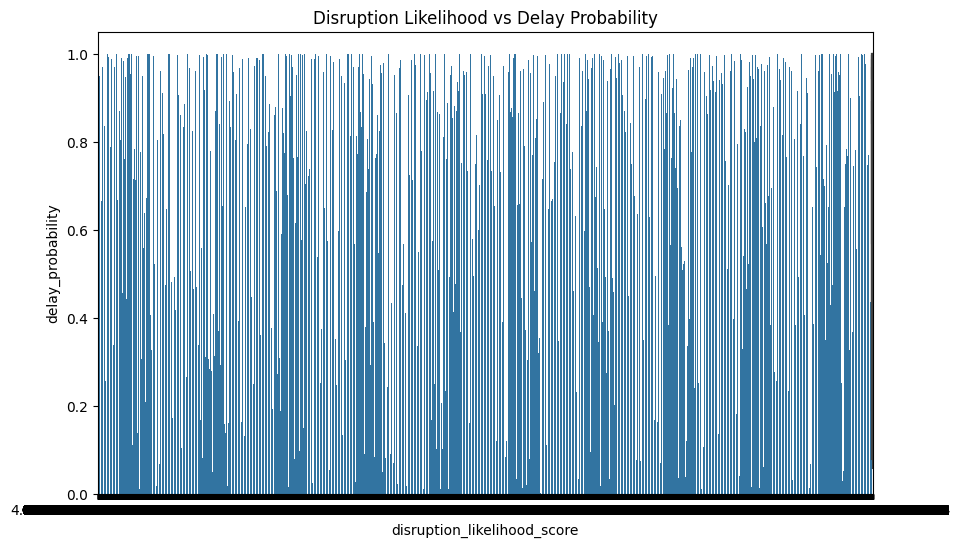

In [17]:

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='disruption_likelihood_score', y='delay_probability')
plt.title("Disruption Likelihood vs Delay Probability")
plt.show()

# Regional analysis


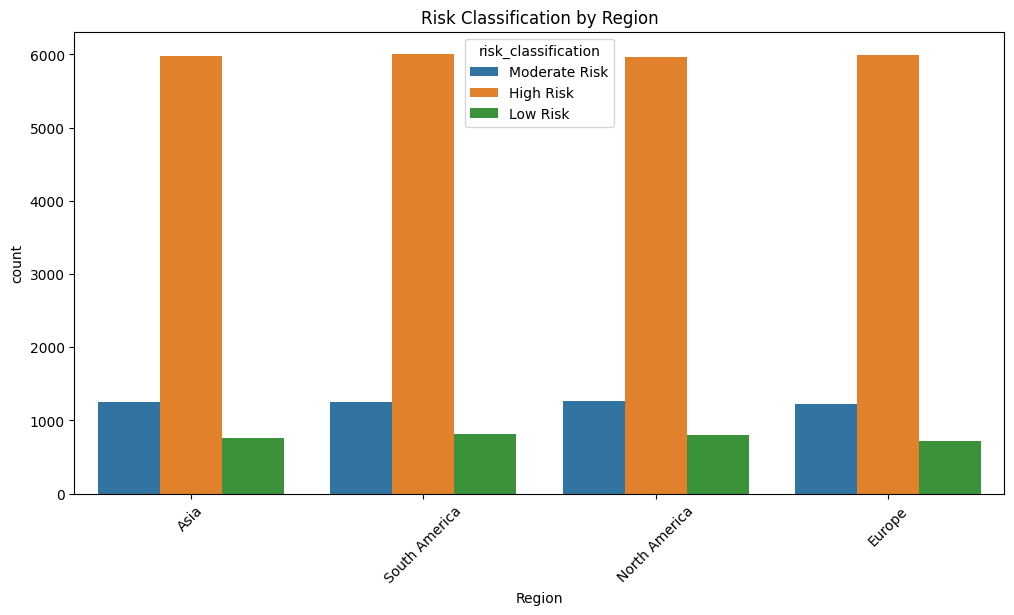

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Region', hue='risk_classification')
plt.title("Risk Classification by Region")
plt.xticks(rotation=45)
plt.show()

In [19]:
data.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,Holiday_Flag,Order_Frequency,Batch_Size,Inventory_Turnover,Safety_Stock_Level,Dead_Stock,Damaged_Stock,Delivery_Delay,Month,Weekday
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0,37,338,9.81,283,74,12,9,1,4
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,1,2,410,1.02,24,209,40,10,1,4
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,1,19,491,9.88,192,240,14,-4,1,4
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,0,40,78,5.53,230,28,20,3,1,4
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,0,17,83,7.00,281,276,41,12,1,4


In [21]:
processed_file = "../../data/silver_layer/processed_supply_chain_data.parquet"
data.to_parquet(processed_file, index=False)
print(f"Processed data saved to {processed_file}")


Processed data saved to ../../data/silver_layer/processed_supply_chain_data.parquet
